In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets
from keras.utils import np_utils

In [2]:
#이 데이터는 아예 나눠져서 들어와있음
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [18]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0  96  81   0   0   0 

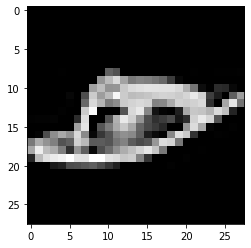

In [4]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray') #이 데이터는 이미지라서
plt.show
print(Y_train[my_sample]) #정답을 확인해보자
print(X_train[my_sample]) 

#데이터를 보면 곱하면 커짐, 그러면 scale을 해줘야함, 0-1사이면 곱해도 커지지 않음.

In [12]:
y_train = np_utils.to_categorical(Y_train)  #onehotencoding을 해줌
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [6]:
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)
x_train = x_train/255  #minmax scale   255니까 0-1로 만들어줌
x_test = x_test/255
print(x_train.shape)  #784개의 픽셀이 들어있는 데이터프레임 6만개

(60000, 784)


In [7]:
model = Sequential()
model.add(Dense(128, input_dim=28*28,
                activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  #카테고리가 10개


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
#학습시키기
fit_hist = model.fit(x_train, y_train, batch_size=128,
                     epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1238 - accuracy: 0.9532 - val_loss: 0.4138 - val_accuracy: 0.8881
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1204 - accuracy: 0.9541 - val_loss: 0.3971 - val_accuracy: 0.8970
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1157 - accuracy: 0.9569 - val_loss: 0.4037 - val_accuracy: 0.8905
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1090 - accuracy: 0.9595 - val_loss: 0.4396 - val_accuracy: 0.8882
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1101 - accuracy: 0.9589 - val_loss: 0.4218 - val_accuracy: 0.8887
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1045 - accuracy: 0.9613 - val_loss: 0.4054 - val_accuracy: 0.8932
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1026 - accuracy: 0.9613 - val_loss: 0.4165 - val_accuracy: 0.8941
Epoch 

In [14]:
#검증하기
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy :', score[1])

Final test set accuracy : 0.8888000249862671


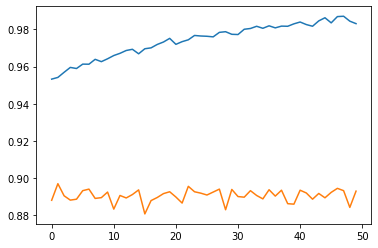

In [15]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()


6
shirt
[[6.0238022e-01 4.3440535e-10 1.1922776e-07 1.0831443e-04 2.6871083e-09
  1.9690878e-15 3.9751142e-01 8.7579495e-19 1.8443044e-08 2.6870526e-12]]
T-shirt


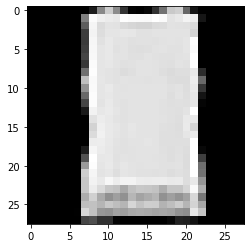

In [29]:
my_sample = np.random.randint(10000) #테스트 안한곳에서 랜덤하게
plt.imshow(X_test[my_sample], cmap='gray')
print(Y_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 28*28))
print(pred)
print(label[np.argmax(pred)])
